In [1]:
%matplotlib inline

import os
import sys
import time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import librosa
import librosa.display

In [2]:
def scale(x, _min=0.0, _max=1.0):
    std = (x - x.min()) / (x.max() - x.min())
    return std * (_max - _min) + _min

/tmp/ipykernel_2916174/357798886.py:10: FutureWarning: Pass y=[0.36239624 0.6494751  0.6317444  ... 0.04336548 0.0557251  0.05700684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspec = librosa.feature.melspectrogram(wave_data, sr=sr, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mels=N_MELS)


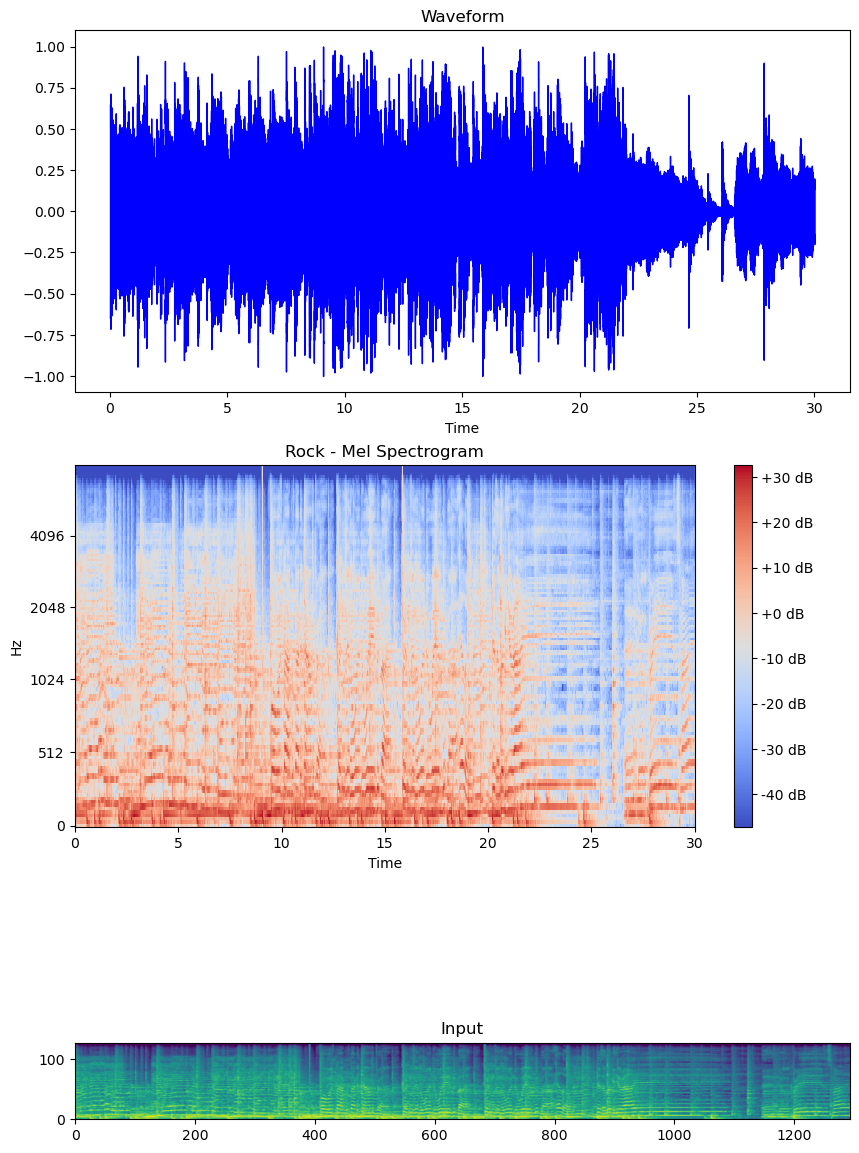

In [22]:
N_FFT = 2048
HOP_LENGTH = 512
N_MELS = 128

DATA_DIR = "/home/s2210421/datasets/gtzan/genres"
file_path = os.path.join(DATA_DIR, "rock/rock.00001.au")

wave_data, sr = librosa.load(file_path, sr=None, dtype=np.float32)
wave_data = librosa.util.normalize(wave_data)
melspec = librosa.feature.melspectrogram(wave_data, sr=sr, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mels=N_MELS)
melspec = librosa.power_to_db(melspec)

processed_img = scale(melspec, 0, 255).astype(np.uint8)
processed_img.shape

matplotlib.rc('figure', figsize=(10, 16))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
librosa.display.waveshow(wave_data, color="Blue", ax=ax1)
ax1.set(title="Waveform")

spectrogram_img = librosa.display.specshow(melspec, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax2)
fig.colorbar(spectrogram_img, ax=ax2, format='%+2.0f dB')
ax2.set(title='Rock - Mel Spectrogram')

ax3.imshow(processed_img, vmin=0, vmax=255, origin='lower')
ax3.set(title="Input")
plt.show()